# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças como angina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/396260-PCIO15-306.jpg"></center>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no *lifestyle*.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.

## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test* é um exame de imagem nuclear que mostra como o sangue flui para o coração enquanto você se exercita ou em repouso. O *Thalium* é um elemento químico radioativo.
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)
  

### Importar os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [2]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil, index_col="ano")
#df = pd.read_csv(data, index_col="data", parse_dates=True)

### Verificando os dados importados
 * Dados da Cleveland Clinic Foundation

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


* Dados da Sociedade Brasileira de Cardiologia

In [4]:
df_brasil.head()

,mortes_doencas_cardio
ano,
2017,383.961
2016,362.091
2015,349.584
2014,340.284
2013,339.672


Olhando acima as informações sobre os atributos da ***Cleveland Clinic Foundation*** , percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [5]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [6]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [7]:
# verificando nossa alteracao
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

Olhando acima as informações sobre os atributos da ***Cleveland Clinic Foundation*** , nosso atributo `thal` - *thallium stress test* que é um exame de imagem nuclear que mostra como o sangue flui a ou em repouso. Possui os seguintes valores:
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
  
Para efeito de análise vamos considerar apenas duas situações:

* **0** - Normal
* **1** - Defeito

Então, iremos igualar a **0** os valores iguais a 3 e **1** para os valores 6 ou 7.

In [8]:
# Quantidades antes da atualização
df.thal.value_counts()

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

In [9]:
# converter valores 3 para 0
df.loc[df.thal == 3, 'thal'] = 0

# converter valores 6 ou 7 para 1
df.loc[df.thal == 6, 'thal'] = 1
df.loc[df.thal == 7, 'thal'] = 1


In [10]:
# Quantidades apos atualização
df.thal.value_counts()

0.0    168
1.0    135
Name: thal, dtype: int64

## Iniciando nossa análise exploratória

* Ver o tamanho do df (shape)
* Ver a descrição estatística do df (describe)
* Ver os tipos das variáveis do df (dtypes)
* Ver as 5 primeiras entradas do df (head)
* Contar quantos valores "não há doença cardíaca" (0) e "há doença cardíaca" (1) existem no *dataset* (value_counts)
* Ver valores ausentes do df (isnull().sum())
* Plotar o gráfico de linha para df_brasil
* Plotar o gráfico de barras para ver a quantidade de homens e mulheres em df
* Plotar o gráfico de dispersão para as variáveis `age` e `chol`
* plotar um histograma para o colesterol sérico
* plotar um gráfico de pizza para `restecg`
* Plotar um *heatmap* com as correlações
* Qualquer outra análise que você quiser.


###  Vamos ver o tamanho do nosso conjunto de dados (dataset)

In [11]:
print('Ocorrências. Numero de casos avaliados :', df.shape[0])
print('Características avaliadas : ', df.shape[1])

Ocorrências. Numero de casos avaliados : 303
Características avaliadas :  14


### Vamos ver como estão distribuídos os nossos dados
* A média da idade dos pacientes é de 54 anos
* Temos 97 mulheres e 206 homens
* E do total de indivíduos 164 não apresentaram doenças cardiovasculares contra 139 que apresentaram.

In [12]:
# Distribuição Geral
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,0.445545,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.497848,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000,1.000000


In [13]:
# Quantidade por sexo
# 0 - Mulher
# 1 - Homen
df.sex.value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

In [14]:
# Quantidade de ocorrencias 
# 0 Não apresenta doença
# 1 Apresenta doença

df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

In [15]:
# Verificando a ocorrencia da presença da doenca por sexo
# Mulheres
# 72 Não apresentaram a doença
# 25 Apresentaram a doença

# Homens
# 92 Não apresentaram a doença
# 114 Apresentaram doença

df.groupby(['sex','num']).count()

age   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
sex num                                                                    
0.0 0     72   72        72    72   72       72       72     72       72   
    1     25   25        25    25   25       25       25     25       25   
1.0 0     92   92        92    92   92       92       92     92       92   
    1    114  114       114   114  114      114      114    114      114   

         slope   ca  thal  
sex num                    
0.0 0       72   72    72  
    1       25   25    25  
1.0 0       92   92    92  
    1      114  114   114

### Vamos identificar o tipo das variáveis

In [16]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

### Exibindo as primeiras linhas do nosso conjunto de dados

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,1.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,0.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,1.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,0.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,0.0,0


### Para nossa análise precisamos verificar se todos os valores estão preenchidos

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

#### Todos os nossos valores estão preenchidos.

### Gráfico do conjunto de dados da Sociedade Brasileira de Cardiologia

#### Para o nosso conjunto de dados da Sociedade Brasileira de Cardiologia

In [19]:
df_brasil.head()

,mortes_doencas_cardio
ano,
2017,383.961
2016,362.091
2015,349.584
2014,340.284
2013,339.672


In [20]:
# importando pacotes 

import matplotlib.pyplot as plt

import seaborn as sns

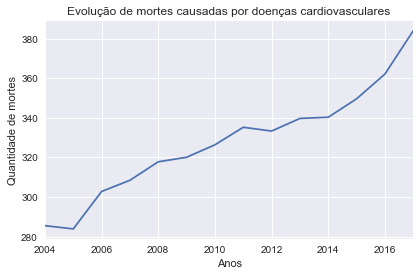

In [28]:
# colocando um efeito para o nosso gráfico
sns.set()

# parametrizando nosso grafico

fig, ax=plt.subplots()

# parametrizando o grafico
df_brasil['mortes_doencas_cardio'].plot(kind='line', ax=ax)

ax.set_title("Evolução de mortes causadas por doenças cardiovasculares")

ax.set_xlabel("Anos")
ax.set_ylabel("Quantidade de mortes")

plt.tight_layout()


#### Pelo gráfico podemos observar que o número de mortes causadas por doenças cardiovasculares, no período de 2004 a 2016, vem aumentado

### Vamos gerar um gráfico de barras para ver a quantidade de homens e mulheres

#### Substituindo os valores do sexo para texto
* 0 - Feminino
* 1 - Masculino

In [22]:
# copiando o dataset para outro
df_sexo = df.copy()

# converter 0 para Feminino
df_sexo.loc[df_sexo.sex == 0 , 'sex'] = 'Feminino'

# converter 1 para Masculino
df_sexo.loc[df_sexo.sex == 1 , 'sex'] = 'Masculino'


In [23]:
import seaborn as sbr

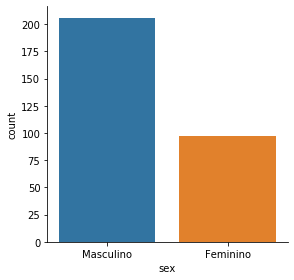

In [24]:
# Com Seaborn
sbr.factorplot('sex', data=df_sexo, kind='count');

In [25]:
df.sex.value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

###  Plotar o gráfico de dispersão para as variáveis `age` e `chol`

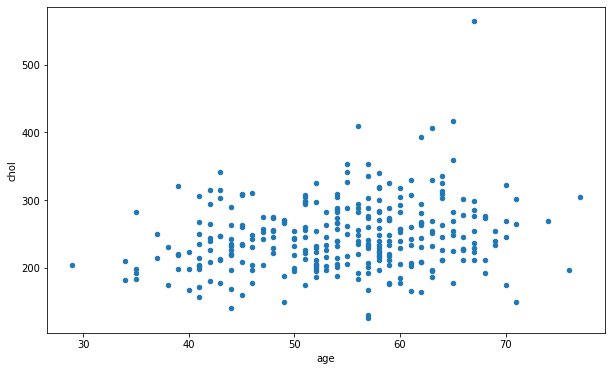

In [26]:
fig, ax=plt.subplots(figsize=(10,6))

df.plot.scatter(x='age', y='chol', ax=ax);

### Com uma reta para representar a regressão linear

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


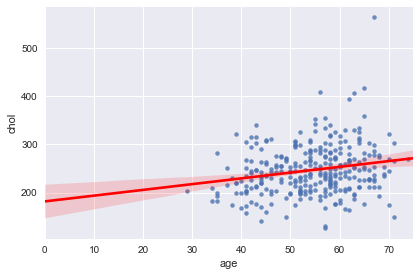

In [38]:
# importar o seaborn
import seaborn as sns

# plotar scatter plot e regressão linear
fig, ax = plt.subplots()

ax.set_xlim(right=75)

sns.regplot(df['age'],df['chol'], scatter_kws={"s":20},
            line_kws={"color": "red"}, data=df, ax=ax)

plt.tight_layout();


* Podemos observar uma leve tendência no aumento do colesterol à medida que a idade aumenta

### Histograma para o colesterol sérico

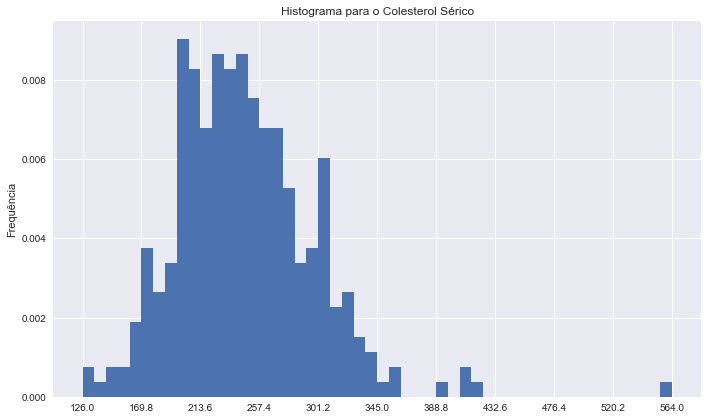

In [39]:
# importando numpy
import numpy as np

# valores do eixo x (xticks)
# array([16.4 , 17.48, 18.56, 19.64, 20.72, 21.8 , 22.88, 23.96, 25.04,26.12, 27.2 ])
count, bin_edges = np.histogram(df['chol'])

# criando nosso grafico
fig, ax=plt.subplots(figsize=(10,6))

# eixo x = Colesterol Serico
df['chol'].plot(kind='hist', ax=ax, bins=50, density= True, xticks=bin_edges)

ax.set_title("Histograma para o Colesterol Sérico")

# Eixo y
ax.set_ylabel("Frequência")

# Exibindo o gráfico
plt.tight_layout();

* Podemos observar que os valores se concentram, aproximadamente, entre 190 e 280 mg/dl

### Gráfico de pizza para `restecg` - Resultado do Eletrocardiografia de Repouso

In [40]:
# verificando as ocorrencia para coluna `resteg` , representarão as fatias do nosso gráfico de pizza
df['restecg'].unique()

array([2., 0., 1.])

In [41]:
# verificando a quantidade de cada ocorrencia
# 0 - Normal
# 1 - Anormalidades de ST
# 2 - Hipertrofia ventricular

df['restecg'].value_counts()

0.0    151
2.0    148
1.0      4
Name: restecg, dtype: int64

In [42]:
# transformando dataframe em dicionario
dict(df['restecg'].value_counts())

{0.0: 151, 2.0: 148, 1.0: 4}

### Atribuindo descrição para os valores de restecg

In [43]:
df_label_pizza = df

#### Renomeando os valores

In [44]:
df_label_pizza['restecg']=df_label_pizza['restecg'].map({0.0:'Normal', 1.0 : 'Anormalidades de ST', 2.0 : 'Hipertrofia Ventricular'})

In [45]:
# Colocando dicionario em variavel
df_label_pizza_dic = dict(df_label_pizza['restecg'].value_counts())

df_label_pizza_dic

{'Normal': 151, 'Hipertrofia Ventricular': 148, 'Anormalidades de ST': 4}

In [46]:
label = df_label_pizza_dic.keys()

In [47]:
size = df_label_pizza_dic.values()

In [48]:
# destacando a fatia de maior valor
exp = (0.1,0,0)

In [49]:
# valores em forma de percentual
per = '%1.1f%%'

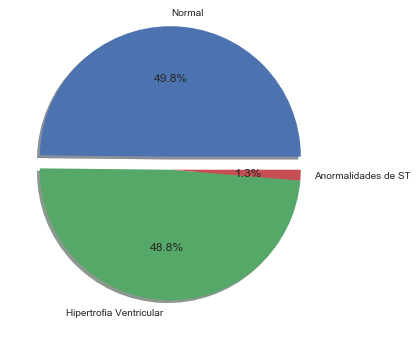

In [50]:
# preparando o grafico
fig , ax=plt.subplots(figsize=(6,6))

# montado o grafico de pizza (pie)
ax.pie(size, labels=label, explode=exp, shadow=True, autopct=per);

* Pelo gráfico podemos observar que praticamente, metade tem o resulado normal e a outra metade tem alguma anormalidade

### Gráfico de mapa de calor *heatmap* com as correlações
.

In [44]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,Hipertrofia Ventricular,150.0,0.0,2.3,3.0,0.0,1.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,Hipertrofia Ventricular,108.0,1.0,1.5,2.0,3.0,0.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,Hipertrofia Ventricular,129.0,1.0,2.6,2.0,2.0,1.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,Normal,187.0,0.0,3.5,3.0,0.0,0.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,Hipertrofia Ventricular,172.0,0.0,1.4,1.0,0.0,0.0,0


,cp,thal,exang,oldpeak,ca,num
cp,1.000000,0.260565,0.384060,0.202277,0.233117,0.414446
thal,0.260565,1.000000,0.324082,0.345731,0.259429,0.520628
exang,0.384060,0.324082,1.000000,0.288223,0.145788,0.431894
oldpeak,0.202277,0.345731,0.288223,1.000000,0.301067,0.424510
ca,0.233117,0.259429,0.145788,0.301067,1.000000,0.460033
num,0.414446,0.520628,0.431894,0.424510,0.460033,1.000000


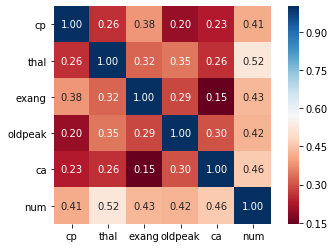

In [45]:
# Importando pacotes necessarios para plotar um gráfico do tipo heatmap (mapa de calor)
# Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlibexang	
import seaborn as sbs 

df_heatmap = df.copy()

# criar uma matriz de correlação dos atributos que mais influenciam na indicação de doença ou não
corr = df_heatmap[['cp', 'restecg','thal','exang','restecg','oldpeak','ca','num']].corr()

# mostrar a matriz de correlação
display(corr)

# plotar um heatmap a partir das correlações
sbs.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

# Alguns insights

## Analisamos dois conjuntos de dados (dataset).

***Cleveland Clinic Foundation*** 

* Conjunto de dados relacionados às doenças cardiovasculares. 
* Foram apresentadas 303 ocorrências com 14 atributos
* A média da idade dos pacientes é de 54 anos
* Temos 97 mulheres e 206 homens
* Do total de 303 ocorrências, 164 não apresentaram doenças cardiovasculares contra 139 que apresentaram.

#### Por Sexo
Mulheres
 * 72 Não apresentaram a doença
 * 25 Apresentaram a doença

 Homens
 * 92 Não apresentaram a doença
 * 114 Apresentaram doença

Pelo gráfico de `Pizza`, conseguimos observar que praticamente metade tem o resultado normal para o Resultado do Eletrocardiograma de Repouso e a outra metade apresentou alguma anormalidade
 
 Podemos gráfico de `Dispersão` podemos concluir que existe uma uma leve tendência no aumento do colesterol à medida que a idade aumenta
 
 Analisando o Mapa de Calor `heatmap`, conseguimos identificar uma correlação entre:
 
 * `cp` - tipo da dor torácica
 * `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
 * `ca` - número de vasos principais colorido por fluoroscopia
 * `thal` - *thallium stress test* é um exame de imagem nuclear que mostra como o sangue flui para o coração enquanto você se exercita ou em repouso.
 * `exang` - angina induzida pelo exercício
 
 ***Sociedade Brasileira de Cardiologia***
 
 A partir do gráfico de linhas, vemos com clareza o aumento do número de morte ano a ano. Período avalidado, 2004 a 2017.
